In [28]:
#preprocessing
import numpy as np
import random

#plotting
import matplotlib.pyplot as plt
from nilearn.maskers import NiftiMasker

#connectivity measures
import nilearn.connectome as nic


## Loading Data

In [2]:
%run loading_data.ipynb

The Python package you are importing, AtlasReader, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using AtlasReader, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data



In [3]:
sub_data, sub_ids = load_txt()
handedness = get_handedness(sub_ids)

Subject Data Loaded
restricted_data loaded


In [4]:
atlas = load_atlas()
atlas_coords = get_atlas_coords(atlas)

/tmp/ipykernel_425/1030149754.py:16: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas = image.threshold_img(atlas, "99.5%")


atlas has shape ['x', 'y', 'z', 'region'] = (91, 109, 91, 100)


In [5]:
#loading labels
def get_labels(atlas_coords):
    brain_region = []
    for atlas_coord in atlas_coords:
        region = read_atlas_peak("harvard_oxford", atlas_coord)
        print(region)
        brain_region += [region]  
    #select the correct region with largest probability given from the library
    brain_region = [
        max(inner_list, key=lambda x: x[0])[-1] if inner_list else None for inner_list in brain_region
        ]
    return np.array(brain_region)
labels = get_labels(atlas_coords)

[[np.float64(62.0), 'Right_Occipital_Pole']]
[[np.float64(50.0), 'Right_Lateral_Occipital_Cortex_superior_division'], [np.float64(30.0), 'Right_Angular_Gyrus']]
[[np.float64(56.0), 'Right_Lateral_Occipital_Cortex_inferior_division'], [np.float64(14.0), 'Right_Occipital_Pole']]
[[np.float64(54.0), 'Left_Cuneal_Cortex'], [np.float64(9.0), 'Right_Cuneal_Cortex']]
[[np.float64(81.0), 'Left_Supramarginal_Gyrus_anterior_division'], [np.float64(6.0), 'Left_Supramarginal_Gyrus_posterior_division']]
[[np.float64(85.0), 'Right_Lateral_Occipital_Cortex_superior_division']]
[[np.float64(66.0), 'Right_Supramarginal_Gyrus_posterior_division'], [np.float64(14.0), 'Right_Angular_Gyrus']]
[[np.float64(68.0), 'Right_Lateral_Occipital_Cortex_superior_division']]
[[np.float64(72.0), 'Left_Lateral_Occipital_Cortex_superior_division']]
[[np.float64(49.0), 'Right_Precuneous_Cortex'], [np.float64(30.0), 'Left_Precuneous_Cortex']]
[[np.float64(47.0), 'Right_Occipital_Fusiform_Gyrus'], [np.float64(26.0), 'Right

In [9]:
labels

array(['Right_Occipital_Pole',
       'Right_Lateral_Occipital_Cortex_superior_division',
       'Right_Lateral_Occipital_Cortex_inferior_division',
       'Left_Cuneal_Cortex', 'Left_Supramarginal_Gyrus_anterior_division',
       'Right_Lateral_Occipital_Cortex_superior_division',
       'Right_Supramarginal_Gyrus_posterior_division',
       'Right_Lateral_Occipital_Cortex_superior_division',
       'Left_Lateral_Occipital_Cortex_superior_division',
       'Right_Precuneous_Cortex', 'Right_Occipital_Fusiform_Gyrus',
       'Left_Angular_Gyrus',
       'Left_Lateral_Occipital_Cortex_superior_division',
       'Left_Lateral_Occipital_Cortex_superior_division',
       'Left_Precuneous_Cortex', 'Right_Occipital_Pole',
       'Right_Intracalcarine_Cortex',
       'Right_Lateral_Occipital_Cortex_superior_division',
       'Left_Occipital_Pole',
       'Left_Lateral_Occipital_Cortex_superior_division',
       'Left_Postcentral_Gyrus', 'Left_Superior_Frontal_Gyrus',
       'Right_Supramargina

### Correlation Matrices

In [ ]:
#create all correlation matrices
matrices = []
for i in range(len(sub_data)):
    matrices.append(np.corrcoef(sub_data[i].T))
matrices = np.array(matrices)

In [5]:
#Correlation matrix
correlation_measure = nic.ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform(sub_data)

In [6]:
correlation_matrix[0]

array([[ 1.        ,  0.06406065,  0.49713855, ...,  0.0145007 ,
        -0.03186874,  0.09747283],
       [ 0.06406065,  1.        , -0.05843183, ..., -0.03494625,
         0.10321584,  0.16452596],
       [ 0.49713855, -0.05843183,  1.        , ..., -0.04135172,
        -0.09471276, -0.06443809],
       ...,
       [ 0.0145007 , -0.03494625, -0.04135172, ...,  1.        ,
         0.07830525,  0.08003848],
       [-0.03186874,  0.10321584, -0.09471276, ...,  0.07830525,
         1.        ,  0.1082698 ],
       [ 0.09747283,  0.16452596, -0.06443809, ...,  0.08003848,
         0.1082698 ,  1.        ]], shape=(100, 100))

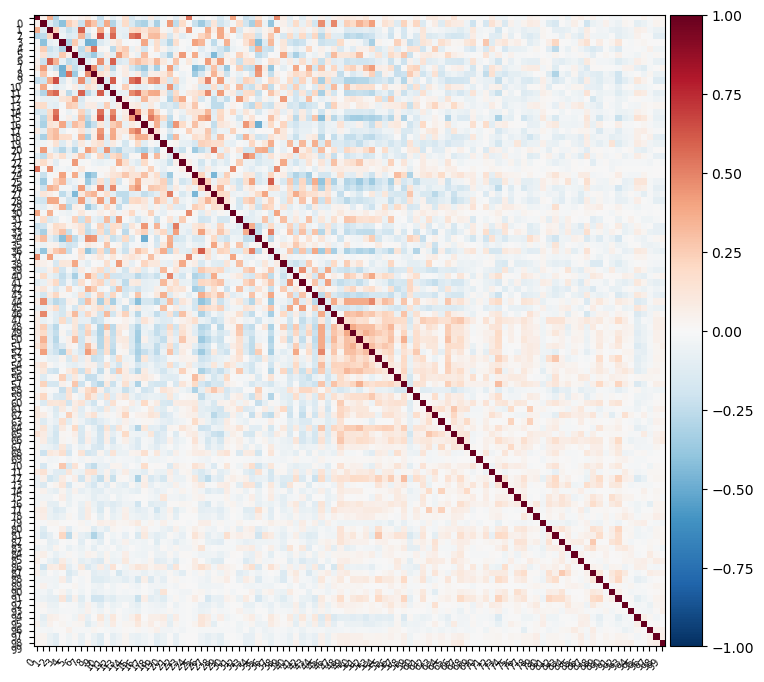

In [7]:
fig, ax = plt.subplots(figsize=(7, 7),
                       layout='constrained')
plotting.plot_matrix(
    correlation_measure.mean_, labels=range(0,100), colorbar=True, vmax=1, vmin=-1, figure=fig
)

In [8]:
plotting.plot_connectome(
    correlation_measure.mean_,
    atlas_coords,
    title="mean partial correlation over all subjects",
    edge_threshold="98%", colorbar=True
)

#### Partial Correlation

Define what are partial Correlations?
- 

In [27]:
p_correlation_measure = nic.ConnectivityMeasure(kind='partial correlation')
p_correlation_matrix = p_correlation_measure.fit_transform(sub_data)

In [29]:
fig, ax = plt.subplots(figsize=(7, 7),
                       layout='constrained')
plotting.plot_matrix(
    p_correlation_matrix[1], labels=range(0,100), colorbar=True, vmax=1, vmin=-1, figure=fig
)

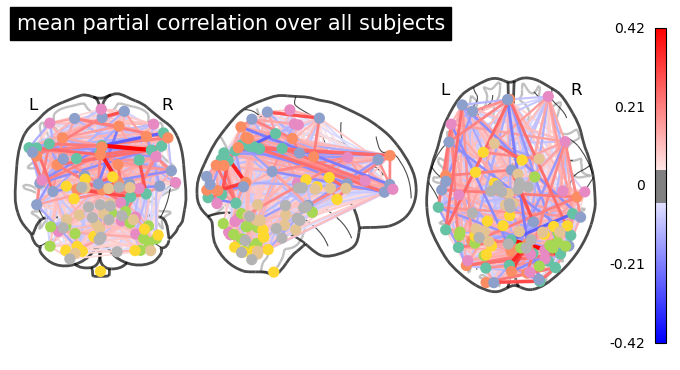

In [34]:
plotting.plot_connectome(
    p_correlation_measure.mean_,
    atlas_coords,
    title="mean partial correlation over all subjects",
    edge_threshold="80%", colorbar=True
)

## Seed Correlations w/ ROIs

- [Check this link](https://nilearn.github.io/dev/auto_examples/03_connectivity/plot_seed_to_voxel_correlation.html)
- Use `['Left_Postcentral_Gyrus', 'Right_Postcentral_Gyrus',
       'Right_Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex)']`
  - Located at the following indices `{37, 40, 42}`

In [122]:
seed_time_series = sub_data[:1,:,40].T
brain_time_series = sub_data[1, :, :]

In [123]:
print(f"Seed time series shape: ({seed_time_series.shape})")
print(f"Brain time series shape: ({brain_time_series.shape})")

Seed time series shape: ((4800, 1))
Brain time series shape: ((4800, 100))


In [124]:
seed_time_series
brain_time_series

array([[  90.17   ,   -0.79663,   30.641  , ...,    5.2192 , -258.47   ,
        -231.1    ],
       [ 122.07   ,   -6.7328 ,   62.396  , ...,  -21.328  ,  -55.616  ,
        -159.19   ],
       [ 110.9    ,  -18.988  ,   55.971  , ...,  -54.396  ,   58.205  ,
          62.532  ],
       ...,
       [  80.597  ,   57.216  ,   28.931  , ..., -102.88   ,  103.58   ,
         -37.691  ],
       [  98.835  ,   36.058  ,  -21.789  , ...,   69.9    ,  -43.342  ,
         114.57   ],
       [  92.924  ,   45.163  ,    4.0601 , ...,   -3.0098 ,  -18.141  ,
        -135.08   ]], shape=(4800, 100))

In [132]:
seed_ts_norm = (seed_time_series - np.mean(seed_time_series)) / np.std(seed_time_series)
brain_ts_norm = (brain_time_series - np.mean(brain_time_series, axis=0)) / np.std(brain_time_series, axis=0)

seed_to_voxel_correlations = (
    np.dot(brain_ts_norm.T, seed_ts_norm) / seed_ts_norm.shape[0]
)
# seed_to_voxel_correlations = (
#     np.corrcoef(seed_time_series, brain_time_series.T)
# )

In [133]:
seed_to_voxel_correlations.shape

(100, 1)

In [134]:
print(
    "Seed-to-voxel correlation shape: ({}, {})".format(
        *seed_to_voxel_correlations.shape
    )
)
print(
    f"Seed-to-voxel correlation: "
    f"min = {seed_to_voxel_correlations.min():.3f}; "
    f"max = {seed_to_voxel_correlations.max():.3f}"
)

Seed-to-voxel correlation shape: (100, 1)
Seed-to-voxel correlation: min = -0.084; max = 0.125


In [137]:
n = 100
a = np.zeros((n,n)) # Initialize nxn matrix
a[40, :] = seed_to_voxel_correlations.T
a[:, 40] = seed_to_voxel_correlations.T

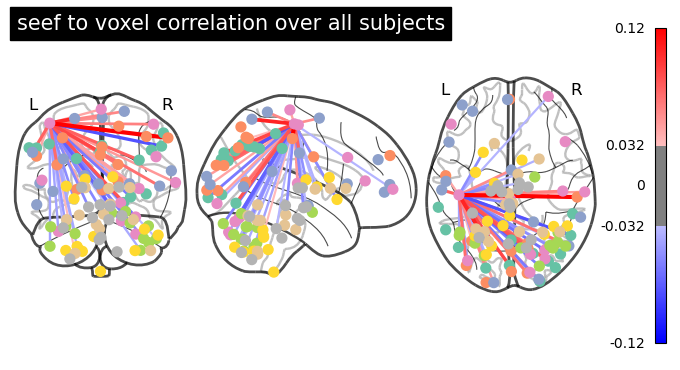

In [139]:
plotting.plot_connectome(
    a,
    atlas_coords,
    title="seef to voxel correlation over all subjects",
    edge_threshold="99%", colorbar=True
)

In [140]:
plotting.view_connectome(
    a,
    atlas_coords,
    title="seef to voxel correlation over all subjects",
    edge_threshold="99%", colorbar=True
)

In [144]:
plotting.plot_markers(
    seed_to_voxel_correlations,
    atlas_coords,
    title="seef to voxel correlation over all subjects",
    colorbar=True,
    node_cmap = 'RdBu_r',
    node_vmin = -0.12,
    node_vmax = 0.12
)

In [ ]:
#Using Fisher's Z-transform

seed_to_voxel_correlations_fisher_z = np.arctanh(seed_to_voxel_correlations.T)

n = 100
a = np.zeros((n,n)) # Initialize nxn matrix
a[40, :] = seed_to_voxel_correlations_fisher_z
a[:, 40] = seed_to_voxel_correlations_fisher_z

plotting.plot_connectome(
    a,
    atlas_coords,
    title="seef to voxel correlation over all subjects",
    edge_threshold="90.9%", colorbar=True
)

## Graphical LASSO and inverse covariance
- [Check this link](https://nilearn.github.io/dev/connectivity/connectome_extraction.html)
- [this link too](https://nilearn.github.io/dev/auto_examples/03_connectivity/plot_multi_subject_connectome.html#sphx-glr-auto-examples-03-connectivity-plot-multi-subject-connectome-py)

In [187]:
def plot_matrices(cov, prec, title, labels):
    """Plot covariance and precision matrices, for a given processing."""
    prec = prec.copy()  # avoid side effects

    # Put zeros on the diagonal, for graph clarity.
    size = prec.shape[0]
    prec[list(range(size)), list(range(size))] = 0
    span = max(abs(prec.min()), abs(prec.max()))

    # Display covariance matrix
    plotting.plot_matrix(
        cov,
        vmin=-1,
        vmax=1,
        title=f"{title} / covariance",
        labels=labels,
    )
    # Display precision matrix
    plotting.plot_matrix(
        prec,
        vmin=-span,
        vmax=span,
        title=f"{title} / precision",
        labels=labels,
    )

In [172]:
from nilearn.connectome import GroupSparseCovarianceCV

gsc = GroupSparseCovarianceCV(verbose=2)
gsc.fit(sub_data[:2])


from sklearn.covariance import GraphicalLassoCV

gl = GraphicalLassoCV(verbose=2)
gl.fit(np.concatenate(sub_data[:2]))

[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  0 out of 4
[GroupSparseCovarianceCV.fit] [GroupSparseCovarianceCV] Done refinement  1 out of 4
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 1
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 4
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 1
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 4
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decreasing. Stopping at iteration 0
[GroupSparseCovarianceCV.fit] Log-likelihood on test set is decr

/home/anmarkova/.conda/envs/capstone/lib/python3.13/site-packages/nilearn/connectome/group_sparse_cov.py:483: UserWarning: Input signals do not all have unit variance. This can lead to numerical instability.
  warnings.warn(


[GroupSparseCovarianceCV.fit] * iteration 1 (1 %) variation (max norm): 2.939e-03  ...
[GroupSparseCovarianceCV.fit] * iteration 2 (2 %) variation (max norm): 1.176e-03  ...
[GroupSparseCovarianceCV.fit] tolerance reached at iteration number 3: 5.482e-04


....../home/anmarkova/.conda/envs/capstone/lib/python3.13/site-packages/sklearn/covariance/_graph_lasso.py:168: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = -precision_[idx, idx] * coefs
/home/anmarkova/.conda/envs/capstone/lib/python3.13/site-packages/sklearn/covariance/_graph_lasso.py:169: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = -precision_[idx, idx] * coefs
..............

[GraphicalLassoCV] Done refinement  1 out of 4:   1s


.....................

[GraphicalLassoCV] Done refinement  2 out of 4:   2s


....................

[GraphicalLassoCV] Done refinement  3 out of 4:   5s


.................../home/anmarkova/.conda/envs/capstone/lib/python3.13/site-packages/numpy/_core/_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


[GraphicalLassoCV] Done refinement  4 out of 4:   7s
[graphical_lasso] Iteration   0, cost  1.27e+03, dual gap 7.237e-01
[graphical_lasso] Iteration   1, cost  1.27e+03, dual gap -1.065e-03
[graphical_lasso] Iteration   2, cost  1.27e+03, dual gap -1.630e-04
[graphical_lasso] Iteration   3, cost  1.27e+03, dual gap 1.405e-05


GraphicalLassoCV(verbose=2)

In [173]:
gl.covariance_

array([[ 7.87332357e+03, -6.62406039e+00,  1.75713830e+03, ...,
         0.00000000e+00, -6.51943463e-01,  8.20945889e+01],
       [-6.62406039e+00,  2.39873320e+03, -7.34432075e+01, ...,
         0.00000000e+00,  5.74490087e+01,  7.87215958e+01],
       [ 1.75713830e+03, -7.34432075e+01,  3.97497170e+03, ...,
         0.00000000e+00, -2.32217421e+02, -3.22064597e+02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.31819895e+03,  0.00000000e+00,  0.00000000e+00],
       [-6.51943463e-01,  5.74490087e+01, -2.32217421e+02, ...,
         0.00000000e+00,  1.16398460e+04,  8.23071283e+02],
       [ 8.20945889e+01,  7.87215958e+01, -3.22064597e+02, ...,
         0.00000000e+00,  8.23071283e+02,  1.12101685e+04]],
      shape=(100, 100))

In [186]:
atlas_img = msdl_atlas_dataset.maps
atlas_region_coords = plotting.find_probabilistic_atlas_cut_coords(atlas_img)
labels = msdl_atlas_dataset.labels

plotting.plot_connectome(
    gl.covariance_,
    atlas_region_coords,
    edge_threshold="90%",
    title="Covariance",
    display_mode="lzr",
)
plotting.plot_connectome(
    -gl.precision_,
    atlas_region_coords,
    edge_threshold="90%",
    title="Sparse inverse covariance (GraphicalLasso)",
    display_mode="lzr",
    edge_vmax=0.5,
    edge_vmin=-0.5,
)
plot_matrices(gl.covariance_, gl.precision_, "GraphicalLasso", labels)

title = "GroupSparseCovariance"
plotting.plot_connectome(
    -gsc.precisions_[..., 0],
    atlas_region_coords,
    edge_threshold="90%",
    title=title,
    display_mode="lzr",
    edge_vmax=0.5,
    edge_vmin=-0.5,
)
plot_matrices(gsc.covariances_[..., 0], gsc.precisions_[..., 0], title, labels)

plotting.show()

NameError: name 'msdl_atlas_dataset' is not defined

In [183]:

plotting.plot_connectome(
    gl.covariance_,
    atlas_coords,
    edge_threshold="90%",
    title="Covariance",
    display_mode="lzr",
)
plotting.plot_connectome(
    -gl.precision_,
    atlas_coords,
    edge_threshold="90%",
    title="Sparse inverse covariance (GraphicalLasso)",
    display_mode="lzr",
    edge_vmax=0.5,
    edge_vmin=-0.5,
)
plot_matrices(gl.covariance_, gl.precision_, "GraphicalLasso", labels)

NameError: name 'plot_matrices' is not defined

#### Sparse Inverse Covariance

In [ ]:
plotting.plot_matrix(
    -estimator.precision_,
    labels=labels,
    figure=(9, 7),
    vmax=1,
    vmin=-1,
    title="Sparse inverse covariance",
)

In [ ]:
plotting.plot_connectome(
    -estimator.precision_, atlas_coords, title="Sparse inverse covariance"
)

plotting.show()

## Maybe Try Building Motor Networks and looking for differences
- [Check this out](https://bdpedigo.github.io/networks-course/representing_networks.html)

## Assess interhemispheric connects and hemispheric asymetry

## Regional Homogeneity